In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pickle

# path_cnn= '/content/drive/My Drive/Colab Notebooks/data/processedID_cnn_dataset.pkl'
path_cnn= '/content/drive/My Drive/Colab Notebooks/data/train_dataset.pkl'

stories = pickle.load(open(path_cnn, 'rb'))
print("total number of CNN data: ",len(stories))

total number of CNN data:  301956


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
index_story = 0
sample_story = stories[index_story]
count_ws =0
for sentence in sample_story['story']:
  for word in sentence.split(' '):
    count_ws += 1
print("# word in story {}: {}".format(index_story,count_ws))

count_h, count_wh = 0,0
for highlight in sample_story['highlights']:
  count_h += 1
  for word in highlight.split(' '):
    count_wh += 1
print("# hightlights of story {}: {}".format(index_story,count_h))
print("# word in all hightlights of story {}: {}".format(index_story,count_wh))
print()
stories[1]

# word in story 0: 473
# hightlights of story 0: 3
# word in all hightlights of story 0: 35



{'highlights': ['arizona judge rules for group trying to stop school districts mexicanamerican studies',
  'ruben navarrette latinoamerican population is growing its fair to teach its history',
  'arizona has approved a series of oppressive measures he says including immigration law',
  'these measures are championed by people afraid of changing demographics he writes'],
 'id': 'id_cnn_66720',
 'story': ['arizonans thats who it figures in the immigration debate the state that has demonstrated that it is terrified of changing demographics and determined to run off latinos seems afraid of its own cultural footprint',
  'were talking about courses in mexicanamerican history being taught to high school students of all colors and backgrounds in the tucson unified school district',
  'concerned that teachers are presenting material in a biased and inflammatory manner a posse of elected officials education bureaucrats and school board trustees made up of democrats and republicans are trying t

In [ ]:
import copy

# number of highlights to be used
NUM_HIGHLIGHT= 1
# number of storie sentences to be used
NUM_STORY = 2

# join sentence in both stories and highlights together for each data sample
processed_stories = copy.deepcopy(stories)

# join stories and highlights into 2 column pd dataframe
for each_story in processed_stories:
  # join highlights
  each_story['highlights'] = ' '.join(each_story['highlights'][0:NUM_HIGHLIGHT])
  # join story sentences
  each_story['story'] = ' '.join(each_story['story'][0:NUM_STORY])


stories[2],processed_stories[2]

({'highlights': ['northwestern university football players vote friday on whether to unionize',
   'supporters say athletes who generate huge money for schools deserve protections',
   'vote result wont be known until after national labor relations board reviews case'],
  'id': 'id_cnn_91222',
  'story': ['northwestern universitys football players voted friday on whether to form a workers union one of the most highprofile efforts by college athletes to demand more rights possibly including payment',
   'but the result of the vote might not be known for months',
   'the national labor relations board allowed the vote after its chicago office ruled in march that northwestern football players can unionize deeming them school employees because of the hours they put in the control the university has over them and the revenue they generate',
   'however northwestern asked the nrlb for a review and the nlrb said the results of fridays vote wont be made public until that is finished the review

In [ ]:
# import copy



# # join sentence in both stories and highlights together for each data sample
# processed_stories = copy.deepcopy(stories)
# for each_story in processed_stories:
#   each_story['story'] = ' '.join(each_story['story'])
#   each_story['highlights'] = ' '.join(each_story['highlights'])

# # join stories and highlights into 2 column pd dataframe
# stories[3],processed_stories[3]

In [ ]:
# join stories and highlights into 2 column pd dataframe
df_cnn = pd.DataFrame(processed_stories)
print(df_cnn.iloc[1,0])
print(df_cnn.iloc[1,1])

df_cnn

arizonans thats who it figures in the immigration debate the state that has demonstrated that it is terrified of changing demographics and determined to run off latinos seems afraid of its own cultural footprint were talking about courses in mexicanamerican history being taught to high school students of all colors and backgrounds in the tucson unified school district
arizona judge rules for group trying to stop school districts mexicanamerican studies


story  ...            id
0       controversial malawi president bingu wa muthar...  ...  id_dm_143548
1       arizonans thats who it figures in the immigrat...  ...  id_cnn_66720
2       northwestern universitys football players vote...  ...  id_cnn_91222
3       a european union delegation met saturday with ...  ...  id_cnn_53005
4       world player of the year lionel messi grabbed ...  ...  id_cnn_21168
...                                                   ...  ...           ...
301951  newcastle legend alan shearer has slammed the ...  ...  id_dm_175879
301952  the mayor of two romanian villages has claimed...  ...   id_dm_29988
301953  the health of pope emeritus benedict xvi has d...  ...  id_dm_162103
301954  like the moment that harry potter first learne...  ...  id_cnn_27915
301955  much of the country has turned up the heat dur...  ...   id_cnn_2259

[301956 rows x 3 columns]

In [ ]:
# a =   'southampton have announced the signing of midfielder saphir taider from inter milan on loan for the season with striker dani osvaldo heading in the opposite direction the algerian international has signed on an initial seasonlong loan with a view to a permanent deal after passing a medical on tuesday'
# len(a.split(' '))

In [ ]:
# # add __START__ and __END__ tokens to highlights

# df_cnn['processed_highlights'] = '_START_ '+df_cnn['highlights'].astype(str)+' _END_'

# print(df_cnn.loc[0,'highlights'])
# print(df_cnn.loc[0,'processed_highlights'])

# df_cnn

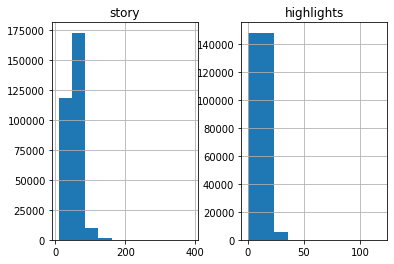

In [ ]:
# !pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

text_count = []
summary_count = []
for sent in df_cnn['story']:
    text_count.append(len(sent.split()))
for sent in df_cnn['highlights']:
    summary_count.append(len(sent.split()))

graph_df= pd.DataFrame()
graph_df['story']=text_count
graph_df['highlights']=summary_count


graph_df.hist(bins = 10)
plt.show()

# sns.displot(df_cnn, x="story", binwidth=10)
# sns.displot(df_cnn, x="highlights", binwidth=10)



In [ ]:
def count_perc_words(df,col_name='story',len_start=0,len_end=15):
  #Check how much % of summary have ... number of words.
  count=0
  for sentence in df_cnn[col_name]:
      num_word = len(sentence.split()) 
      if  (num_word >= len_start) and (num_word < len_end):
          count=count+1
  return (count/len(df_cnn[col_name]))

# print("% of story have 0 to 500 words =",count_perc_words(df_cnn,'story',0,500))
# print("% of story have 500 to 1000 words =",count_perc_words(df_cnn,'story',500,1000))
# print("% of story have 1000 to 1500 words =",count_perc_words(df_cnn,'story',1000,1500))
# print("% of story have more than 1500 words =",count_perc_words(df_cnn,'story',1500,9900))

# print("% of highlight have 0 to 50 words =",count_perc_words(df_cnn,'highlights',0,50))
# print("% of highlight have 50 to 100 words =",count_perc_words(df_cnn,'highlights',50,100))
# print("% of highlight have more than 100 words =",count_perc_words(df_cnn,'highlights',100,9900))



In [ ]:
# max_len_sum = 30
# max_len_text = 180
# count=0
# for highlight,story in zip(df_cnn['highlights'],df_cnn['story']):
#     num_word_h = len(highlight.split())
#     num_word_s = len(story.split()) 
#     # print(num_word_h,num_word_s)
#     if (num_word_h < max_len_sum) and  (num_word_s < max_len_text):
#       count += 1
# print(count)

In [ ]:

#Shorten the Summaries and Text between max len defined above
def count_word(sentence):
  return len(sentence.split(' '))

# count #word in highlight/summary
df_cnn['num_word_highlights'] = df_cnn.apply(lambda row: count_word(row['highlights']), axis=1)
# count #word in story
df_cnn['num_word_story'] = df_cnn.apply(lambda row: count_word(row['story']), axis=1)

print('max num_word_highlights:',max(df_cnn['num_word_highlights']),'max num_word_story:',max(df_cnn['num_word_story']))
print('mean num_word_highlights:',np.mean(df_cnn['num_word_highlights']),'max num_word_story:',np.mean(df_cnn['num_word_story']))
print('median num_word_highlights:',np.median(df_cnn['num_word_highlights']),'max num_word_story:',np.median(df_cnn['num_word_story']))


df_cnn.head(10)

max num_word_highlights: 118 max num_word_story: 388
mean num_word_highlights: 12.434069864483567 max num_word_story: 53.13195631151559
median num_word_highlights: 12.0 max num_word_story: 51.0


story  ... num_word_story
0  controversial malawi president bingu wa muthar...  ...             46
1  arizonans thats who it figures in the immigrat...  ...             58
2  northwestern universitys football players vote...  ...             41
3  a european union delegation met saturday with ...  ...             36
4  world player of the year lionel messi grabbed ...  ...             61
5  hull boss steve bruce believes any side he cho...  ...             68
6  a woman was so distracted checking facebook on...  ...             56
7  the squeaky clean star of high school musical ...  ...             68
8  it seems these two real estate agents saved th...  ...             47
9  cap british restaurateur rekha patel cradled h...  ...             21

[10 rows x 5 columns]

In [ ]:
MAX_LEN_TEXT=100
MAX_LEN_SUM=30

MIN_LEN_TEXT = 10
MIN_LEN_SUM = 5

df_cnn=df_cnn[ (df_cnn['num_word_highlights']>MIN_LEN_SUM) & (df_cnn['num_word_highlights']<=MAX_LEN_SUM) \
             & (df_cnn['num_word_story']>MIN_LEN_TEXT) & (df_cnn['num_word_story']<=MAX_LEN_TEXT)]

df_cnn

story  ... num_word_story
0       controversial malawi president bingu wa muthar...  ...             46
1       arizonans thats who it figures in the immigrat...  ...             58
2       northwestern universitys football players vote...  ...             41
3       a european union delegation met saturday with ...  ...             36
4       world player of the year lionel messi grabbed ...  ...             61
...                                                   ...  ...            ...
301950  wales begin their rbs nations campaign with a ...  ...             39
301951  newcastle legend alan shearer has slammed the ...  ...             40
301952  the mayor of two romanian villages has claimed...  ...             58
301953  the health of pope emeritus benedict xvi has d...  ...             39
301955  much of the country has turned up the heat dur...  ...             52

[295758 rows x 5 columns]

In [ ]:
# put _START_ and _END_ tokens at shorten_highlights
df_cnn.loc[:,'shorten_highlights']= df_cnn['highlights']
df_cnn.loc[:,'shorten_story']= df_cnn['story']

df_cnn['shorten_highlights'] = '_START_ '+df_cnn['shorten_highlights'].astype(str)+' _END_'
df_cnn

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

story  ...                                      shorten_story
0       controversial malawi president bingu wa muthar...  ...  controversial malawi president bingu wa muthar...
1       arizonans thats who it figures in the immigrat...  ...  arizonans thats who it figures in the immigrat...
2       northwestern universitys football players vote...  ...  northwestern universitys football players vote...
3       a european union delegation met saturday with ...  ...  a european union delegation met saturday with ...
4       world player of the year lionel messi grabbed ...  ...  world player of the year lionel messi grabbed ...
...                                                   ...  ...                                                ...
301950  wales begin their rbs nations campaign with a ...  ...  wales begin their rbs nations campaign with a ...
301951  newcastle legend alan shearer has slammed the ...  ...  newcastle legend alan shearer has slammed the ...
301952  the mayor of two romanian villages has claimed...  ...  the mayor of two romanian villages has claimed...
301953  the health of pope emeritus benedict xvi has d...  ...  the health of pope emeritus benedict xvi has d...
301955  much of the country has turned up the heat dur...  ...  much of the country has turned up the heat dur...

[295758 rows x 7 columns]

In [ ]:
# #Model to summarize the text between 0-50 words for Summary and 0-900 words for Text
# MAX_LEN_TEXT=200 # max len 900 covers 80 percent
# MAX_LEN_SUM=30   # max len 50 covers 80 percent

# #Shorten the Summaries and Text between max len defined above
# def shorten_sentence(sentence,max_len=50):
#   sentence_temp =[]
#   count = 0
#   for word in sentence.split(' '):
#     # break when hitting max length
#     if count == max_len:
#       break 
#     sentence_temp.append(word)
#     count += 1
#   sentence = ' '.join(sentence_temp)
#   return sentence

# # shorten highlight/summary
# df_cnn['shorten_highlights'] = df_cnn.apply(lambda row: shorten_sentence(row['highlights'],max_len=MAX_LEN_SUM), axis=1)
# # shorten story
# df_cnn['shorten_story'] = df_cnn.apply(lambda row: shorten_sentence(row['story'],max_len=MAX_LEN_TEXT), axis=1)


# print("% of highlight have 50 to 100 words =",count_perc_words(df_cnn,'shorten_highlights',51,100))
# print("% of highlight have 50 to 100 words =",count_perc_words(df_cnn,'highlights',51,100))

# print("% of highlight have more than 500 words =",count_perc_words(df_cnn,'shorten_story',501,10000))
# print("% of highlight have more than 500 words =",count_perc_words(df_cnn,'story',501,100000))

# # put _START_ and _END_ tokens at shorten_highlights
# df_cnn['shorten_highlights'] = '_START_ '+df_cnn['shorten_highlights'].astype(str)+' _END_'

# df_cnn


In [ ]:
# add sostok and eostok (token) to shorten_highlights
# df_cnn['shorten_highlights'] = df_cnn['shorten_highlights'].apply(lambda x : 'sostok '+ x + ' eostok')
df_cnn['shorten_highlights'] = df_cnn.apply(lambda row : 'sostok '+ row['shorten_highlights'] + ' eostok',axis=1)

df_cnn.head(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


story  ...                                      shorten_story
0  controversial malawi president bingu wa muthar...  ...  controversial malawi president bingu wa muthar...
1  arizonans thats who it figures in the immigrat...  ...  arizonans thats who it figures in the immigrat...
2  northwestern universitys football players vote...  ...  northwestern universitys football players vote...
3  a european union delegation met saturday with ...  ...  a european union delegation met saturday with ...
4  world player of the year lionel messi grabbed ...  ...  world player of the year lionel messi grabbed ...

[5 rows x 7 columns]

In [ ]:
print(df_cnn.loc[2,'shorten_story'])
print(df_cnn.loc[20,'shorten_story'])
df_cnn.loc[2,'shorten_highlights'],df_cnn.loc[20,'shorten_highlights']


northwestern universitys football players voted friday on whether to form a workers union one of the most highprofile efforts by college athletes to demand more rights possibly including payment but the result of the vote might not be known for months
this is the bizarre sight of thousands of videos which have been dumped on farmland by suspected flytippers the unwanted collection of tapes includes everything from james bond through to bob the builder and a carol vorderman fitness video


('sostok _START_ northwestern university football players vote friday on whether to unionize _END_ eostok',
 'sostok _START_ tapes include everything from bob the builder through to james bond _END_ eostok')

In [ ]:
from sklearn.model_selection import train_test_split
# X_train,X_vali,Y_train,Y_vali=train_test_split(np.array(df_cnn['shorten_story']),np.array(df_cnn['shorten_highlights']),train_size=80000,random_state=0,shuffle=False)
X_train,X_vali,Y_train,Y_vali=train_test_split(np.array(df_cnn['shorten_story']),np.array(df_cnn['shorten_highlights']),train_size=0.90,random_state=0,shuffle=False)
X_train.shape, X_vali.shape, Y_train.shape, Y_vali.shape
# train/val: 80000, 12579

# train_id 0 to 79999 (id_0 - id_79999)
# x_train[79999]
# stories[79999]

((266182,), (29576,), (266182,), (29576,))

In [ ]:
%%time
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

#prepare a tokenizer for reviews on training data
X_tokenizer = Tokenizer() 
X_tokenizer.fit_on_texts(list(X_train))

threshold=4

count=0
total_count=0
frequency=0
total_freq=0

for key,value in X_tokenizer.word_counts.items():
    total_count += 1
    total_freq += value
    if(value < threshold):
        count=count+1
        frequency=frequency+value
print("% of rare words in vocabulary:",(count/total_count)*100)
print("Total Coverage of rare words:",(frequency/total_freq)*100)

#prepare a tokenizer for reviews on training data
X_tokenizer = Tokenizer(num_words=total_count-count) 
X_tokenizer.fit_on_texts(list(X_train))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
X_train_seq    =   X_tokenizer.texts_to_sequences(X_train) 
X_vali_seq   =   X_tokenizer.texts_to_sequences(X_vali)

#padding zero upto maximum length
X_train    =   pad_sequences(X_train_seq,  maxlen=MAX_LEN_TEXT, padding='post')
X_vali   =   pad_sequences(X_vali_seq, maxlen=MAX_LEN_TEXT, padding='post')

#size of vocabulary ( +1 for padding token)
X_voc   =  X_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(X_voc))

% of rare words in vocabulary: 65.46420101055237
Total Coverage of rare words: 1.1496141966465028
Size of vocabulary in X = 60286
CPU times: user 40.3 s, sys: 365 ms, total: 40.6 s
Wall time: 40.7 s


In [ ]:
%%time
Y_tokenizer = Tokenizer()   
Y_tokenizer.fit_on_texts(list(Y_train))

threshold=6

count=0
total_count=0
frequency=0
total_freq=0

for key,value in Y_tokenizer.word_counts.items():
    total_count += 1
    total_freq += value
    if(value < threshold):
        count += 1
        frequency += value
    
print("% of rare words in vocabulary:",(count/total_count)*100)
print("Total Coverage of rare words:",(frequency/total_freq)*100)

#prepare a tokenizer for reviews on training data
Y_tokenizer = Tokenizer(num_words=total_count-count) 
Y_tokenizer.fit_on_texts(list(Y_train))

#convert text sequences into integer sequences (i.e one hot encode the text in Y)
Y_train_seq    =   Y_tokenizer.texts_to_sequences(Y_train)
Y_vali_seq   =   Y_tokenizer.texts_to_sequences(Y_vali) 

#padding zero upto maximum length
Y_train    =   pad_sequences(Y_train_seq, maxlen=MAX_LEN_SUM, padding='post')
Y_vali   =   pad_sequences(Y_vali_seq, maxlen=MAX_LEN_SUM, padding='post')

#size of vocabulary
Y_voc  =   Y_tokenizer.num_words +1
print("Size of vocabulary in Y = {}".format(Y_voc))

% of rare words in vocabulary: 76.24843699448249
Total Coverage of rare words: 3.3273843982612212
Size of vocabulary in Y = 27164
CPU times: user 18.3 s, sys: 161 ms, total: 18.4 s
Wall time: 18.4 s


In [ ]:
# We will now remove "Summary" i.e Y (both train and val) which has only START and END
idx=[]
for i in range(len(Y_train)):
    count=0
    for j in Y_train[i]:
        if j != 0:
            count += 1
    if(count == 2):
        idx.append(i)

Y_train=np.delete(Y_train,idx, axis=0)
X_train=np.delete(X_train,idx, axis=0)

idx=[]
for i in range(len(Y_vali)):
    count=0
    for j in Y_vali[i]:
        if j != 0:
            count += 1
    if(count == 2):
        idx.append(i)

Y_vali=np.delete(Y_vali,idx, axis=0)
X_vali=np.delete(X_vali,idx, axis=0)

In [ ]:
from keras import backend as K 
import gensim
from numpy import *
import numpy as np
import pandas as pd 
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.3.0
Running on TPU  ['10.36.128.34:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.36.128.34:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.36.128.34:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
print("Size of vocabulary from the w2v model = {}".format(X_voc))

K.clear_session()


Size of vocabulary from the w2v model = 60286


In [ ]:
latent_dim = 300
embedding_dim=200

with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU

  # Encoder
  encoder_inputs = Input(shape=(MAX_LEN_TEXT,))

  #embedding layer
  enc_emb =  Embedding(X_voc, embedding_dim,trainable=True)(encoder_inputs)

  #encoder lstm 1
  # encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
  encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0)

  encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

  #encoder lstm 2
  # encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
  encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0)

  encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

  #encoder lstm 3
  # encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
  encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0)

  encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [ ]:
with tpu_strategy.scope(): # creating the model in the TPUStrategy scope means we will train the model on the TPU

  # Set up the decoder, using `encoder_states` as initial state.
  decoder_inputs = Input(shape=(None,))

  #embedding layer
  dec_emb_layer = Embedding(Y_voc, embedding_dim,trainable=True)
  dec_emb = dec_emb_layer(decoder_inputs)

  # decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
  decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0)

  decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

  #dense layer
  decoder_dense =  TimeDistributed(Dense(Y_voc, activation='softmax'))
  decoder_outputs = decoder_dense(decoder_outputs)

  # Define the model 
  model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

  model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 200)     12057200    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100, 300), ( 601200      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [ ]:

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')


In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=3)

In [ ]:
%%time
## fitting
history=model.fit([X_train,Y_train[:,:-1]], Y_train.reshape(Y_train.shape[0],Y_train.shape[1], 1)[:,1:] ,epochs=100,callbacks=[es],batch_size=512 * tpu_strategy.num_replicas_in_sync, validation_data=([X_vali,Y_vali[:,:-1]], Y_vali.reshape(Y_vali.shape[0],Y_vali.shape[1], 1)[:,1:]))
# history=model.fit([X_train,Y_train[:,:-1]], Y_train.reshape(Y_train.shape[0],Y_train.shape[1], 1)[:,1:] ,epochs=10,callbacks=[es],batch_size=32, validation_data=([X_vali,Y_vali[:,:-1]], Y_vali.reshape(Y_vali.shape[0],Y_vali.shape[1], 1)[:,1:]))

Epoch 1/100
Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


Instructions for updating:
Use `tf.data.Iterator.get_next_as_optional()` instead.


 2/65 [..............................] - ETA: 8s - loss: 10.1878WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0021s vs `on_train_batch_end` time: 0.2599s). Check your callbacks.


65/65 [==============================] - ETA: 0s - loss: 4.1660WARNING:tensorflow:Callbacks method `on_test_batch_end` is slow compared to the batch time (batch time: 0.0017s vs `on_test_batch_end` time: 0.0818s). Check your callbacks.


65/65 [==============================] - 31s 480ms/step - loss: 4.1660 - val_loss: 3.3217
Epoch 2/100
65/65 [==============================] - 18s 279ms/step - loss: 3.2518 - val_loss: 3.1213
Epoch 3/100
65/65 [==============================] - 18s 277ms/step - loss: 3.1171 - val_loss: 3.0455
Epoch 4/100
65/65 [==============================] - 18s 278ms/step - loss: 3.0594 - val_loss: 2.9964
Epoch 5/100
65/65 [==============================] - 18s 276ms/step - loss: 2.9948 - val_loss: 2.9218
Epoch 6/100
65/65 [==============================] - 18s 277ms/step - loss: 2.9228 - val_loss: 2.8610
Epoch 7/100
65/65 [==============================] - 18s 277ms/step - loss: 2.8652 - val_loss: 2.8150
Epoch 8/100
65/65 [==============================] - 18s 276ms/step - loss: 2.8163 - val_loss: 2.7715
Epoch 9/100
65/65 [==============================] - 18s 277ms/step - loss: 2.7679 - val_loss: 2.7215
Epoch 10/100
65/65 [==============================] - 18s 278ms/step - loss: 2.7185 - val_loss

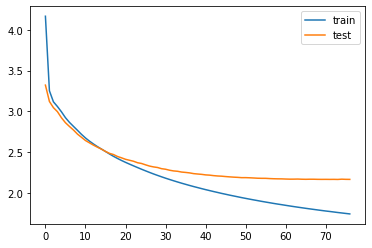

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
import json

# # save loss into json for later plotting

# list all data in history
print(history.history.keys())
import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict = history.history

# Save it under the form of a json file
# json.dump(history_dict, open(save_loc+'/history_loss.json', 'w'))


# load history
# history_dict = json.load(open(save_loc+'/history_loss.json', 'r'))
# history_dict

dict_keys(['loss', 'val_loss'])


In [ ]:
reverse_target_word_index=Y_tokenizer.index_word
reverse_source_word_index=X_tokenizer.index_word
target_word_index=Y_tokenizer.word_index

In [ ]:
# #### LOAD MODELS #######
# from keras.models import model_from_json
# # save_loc = '/content/drive/My Drive/Colab Notebooks/data'

# def load_model(model_filename, model_weights_filename):
#     with open(model_filename, 'r', encoding='utf8') as f:
#         model = model_from_json(f.read())
#     model.load_weights(model_weights_filename)
#     return model

# encoder_model_ = load_model(save_loc+'/encoder_model.json', save_loc+'/encoder_model_weights.h5')
# decoder_model_ = load_model(save_loc+'/decoder_model.json', save_loc+'/decoder_model_weights.h5')

In [ ]:

# Encode the input sequence to get the feature vector
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(MAX_LEN_TEXT,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs) 
# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_outputs2) 

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
# # https://stackoverflow.com/questions/48158547/restore-keras-seq2seq-model
# save_loc = '/content/drive/My Drive/Colab Notebooks/data'
# with open(save_loc+'/encoder_model.json', 'w', encoding='utf8') as f:
#     f.write(encoder_model.to_json())
# encoder_model.save_weights(save_loc+'/encoder_model_weights.h5')

# with open(save_loc+'/decoder_model.json', 'w', encoding='utf8') as f:
#     f.write(decoder_model.to_json())
# decoder_model.save_weights(save_loc+'/decoder_model_weights.h5')

In [ ]:

def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (MAX_LEN_SUM-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence
    
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
# encoder_model.summary(), decoder_model.summary(), model.summary()

In [ ]:
%%time
for i in range(40,60):
# for i in tqdm(range(0,10000)):

    print("Review:",seq2text(X_train[i]))
    print("Original summary:",seq2summary(Y_train[i]))
    print("Predicted summary:",decode_sequence(X_train[i].reshape(1,MAX_LEN_TEXT)))
    print("\n")
    # decode_sequence(x_tr[i].reshape(1,max_text_len))

print(len(X_train))

Review: your grownup kids arent coming home for christmas theyre all married and its the inlaws turn to host dinner in another state or your divorce is finally final and your ex has the kids this year yes you can celebrate a few days later but what do you do on christmas the holidays are an extremely difficult time and bring up a lot of memories of the missing loved ones said r robert a psychiatrist with the mayo clinic break the familiar routine that could bring up potentially painful memories suggested 
Original summary: start in india travelers can explore religious traditions of end 
Predicted summary:  start jeff greene says the age of the us is a good way to be a good end


Review: american airlines has temporarily grounded eight planes to evaluate them after seats became loose on two flights in the last three days prompting safety regulators to look into the matter the airline whose parent amr corp filed for bankruptcy protection in november is eight boeing co planes after a row

In [ ]:

def decode_sequence2(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model_.predict(input_seq)
    
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    # Populate the first word of target sequence with the start word.
    target_seq[0, 0] = target_word_index['sostok']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
      
        output_tokens, h, c = decoder_model_.predict([target_seq] + [e_out, e_h, e_c])

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='eostok'):
            decoded_sentence += ' '+sampled_token

        # Exit condition: either hit max length or find stop word.
        if (sampled_token == 'eostok'  or len(decoded_sentence.split()) >= (MAX_LEN_SUM-1)):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence
    
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
        if((i!=0 and i!=target_word_index['sostok']) and i!=target_word_index['eostok']):
            newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
        if(i!=0):
            newString=newString+reverse_source_word_index[i]+' '
    return newString

In [ ]:
%%time
for i in range(1000,1020):
# for i in tqdm(range(0,10000)):

    print("Review:",seq2text(X_train[i]))
    print("Original summary:",seq2summary(Y_train[i]))
    print("Predicted summary:",decode_sequence2(X_train[i].reshape(1,MAX_LEN_TEXT)))
    print("\n")
    # decode_sequence(x_tr[i].reshape(1,max_text_len))

print(len(X_train))

Review: syrian rebels prepare to unleash their latest improvised weapon in their desperate struggle against the assad regime a homemade rocket launcher constructed from salvaged pipe firing projectiles made from domestic gas canisters the conflict which has been raging for two years and nine months has seen fighters from the free syria army deploying increasingly effective weapons against the far better equipped government forces 
Original summary: start improvised device fires made from domestic gas canisters end 
Predicted summary:  start syrian rebels have been targeted by isis militants in syria end


Review: with its own private beach and tranquil surroundings this norwegian house is up for sale for just there is a condition however for any prospective buyer they must focus their efforts into restoring the ramshackle property to its former glory 
Original summary: start the home is located on the island of on the of the arctic circle end 
Predicted summary:  start the property in 

In [ ]:
# from keras.models import model_from_json

# def load_model(model_filename, model_weights_filename):
#     with open(model_filename, 'r', encoding='utf8') as f:
#         model = model_from_json(f.read())
#     model.load_weights(model_weights_filename)
#     return model

# encoder_ = load_model(save_loc+'/encoder_model.json', save_loc+'/encoder_model_weights.h5')
# decoder_ = load_model(save_loc+'/decoder_model.json', save_loc+'/decoder_model_weights.h5')

In [ ]:
history.history


{'loss': [4.165976524353027,
  3.251847743988037,
  3.1170897483825684,
  3.059441566467285,
  2.9947807788848877,
  2.922792434692383,
  2.8652327060699463,
  2.8162684440612793,
  2.7678956985473633,
  2.7184998989105225,
  2.674139976501465,
  2.635169267654419,
  2.600064992904663,
  2.5673675537109375,
  2.5376534461975098,
  2.5083651542663574,
  2.4776694774627686,
  2.4490396976470947,
  2.4228129386901855,
  2.3982043266296387,
  2.3750851154327393,
  2.353367805480957,
  2.3321690559387207,
  2.3113410472869873,
  2.290792226791382,
  2.271045684814453,
  2.251676082611084,
  2.232870101928711,
  2.215169668197632,
  2.1979012489318848,
  2.1810829639434814,
  2.1651172637939453,
  2.149549722671509,
  2.13446044921875,
  2.119769811630249,
  2.1057803630828857,
  2.0919179916381836,
  2.07859206199646,
  2.065929651260376,
  2.0531294345855713,
  2.04081392288208,
  2.029024362564087,
  2.0172107219696045,
  2.0061230659484863,
  1.9945460557937622,
  1.9840612411499023,
  1